# Week 2 - Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis
# Name: Praveen Kumar Rayapati
# Course: Advanced Big Data and Data Mining
# Assignment: Lab 1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# STEP 1: DATA COLLECTION

# Load the dataset
df  = pd.read_csv("/content/sample_data/Bank Customer Churn Prediction.csv")

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic info about the dataset
print("\nDataset Info:")
print(df.info())

Dataset loaded successfully!
Dataset shape: (10000, 12)

First 5 rows of the dataset:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Dataset Info:
<class 'pandas.core.fr

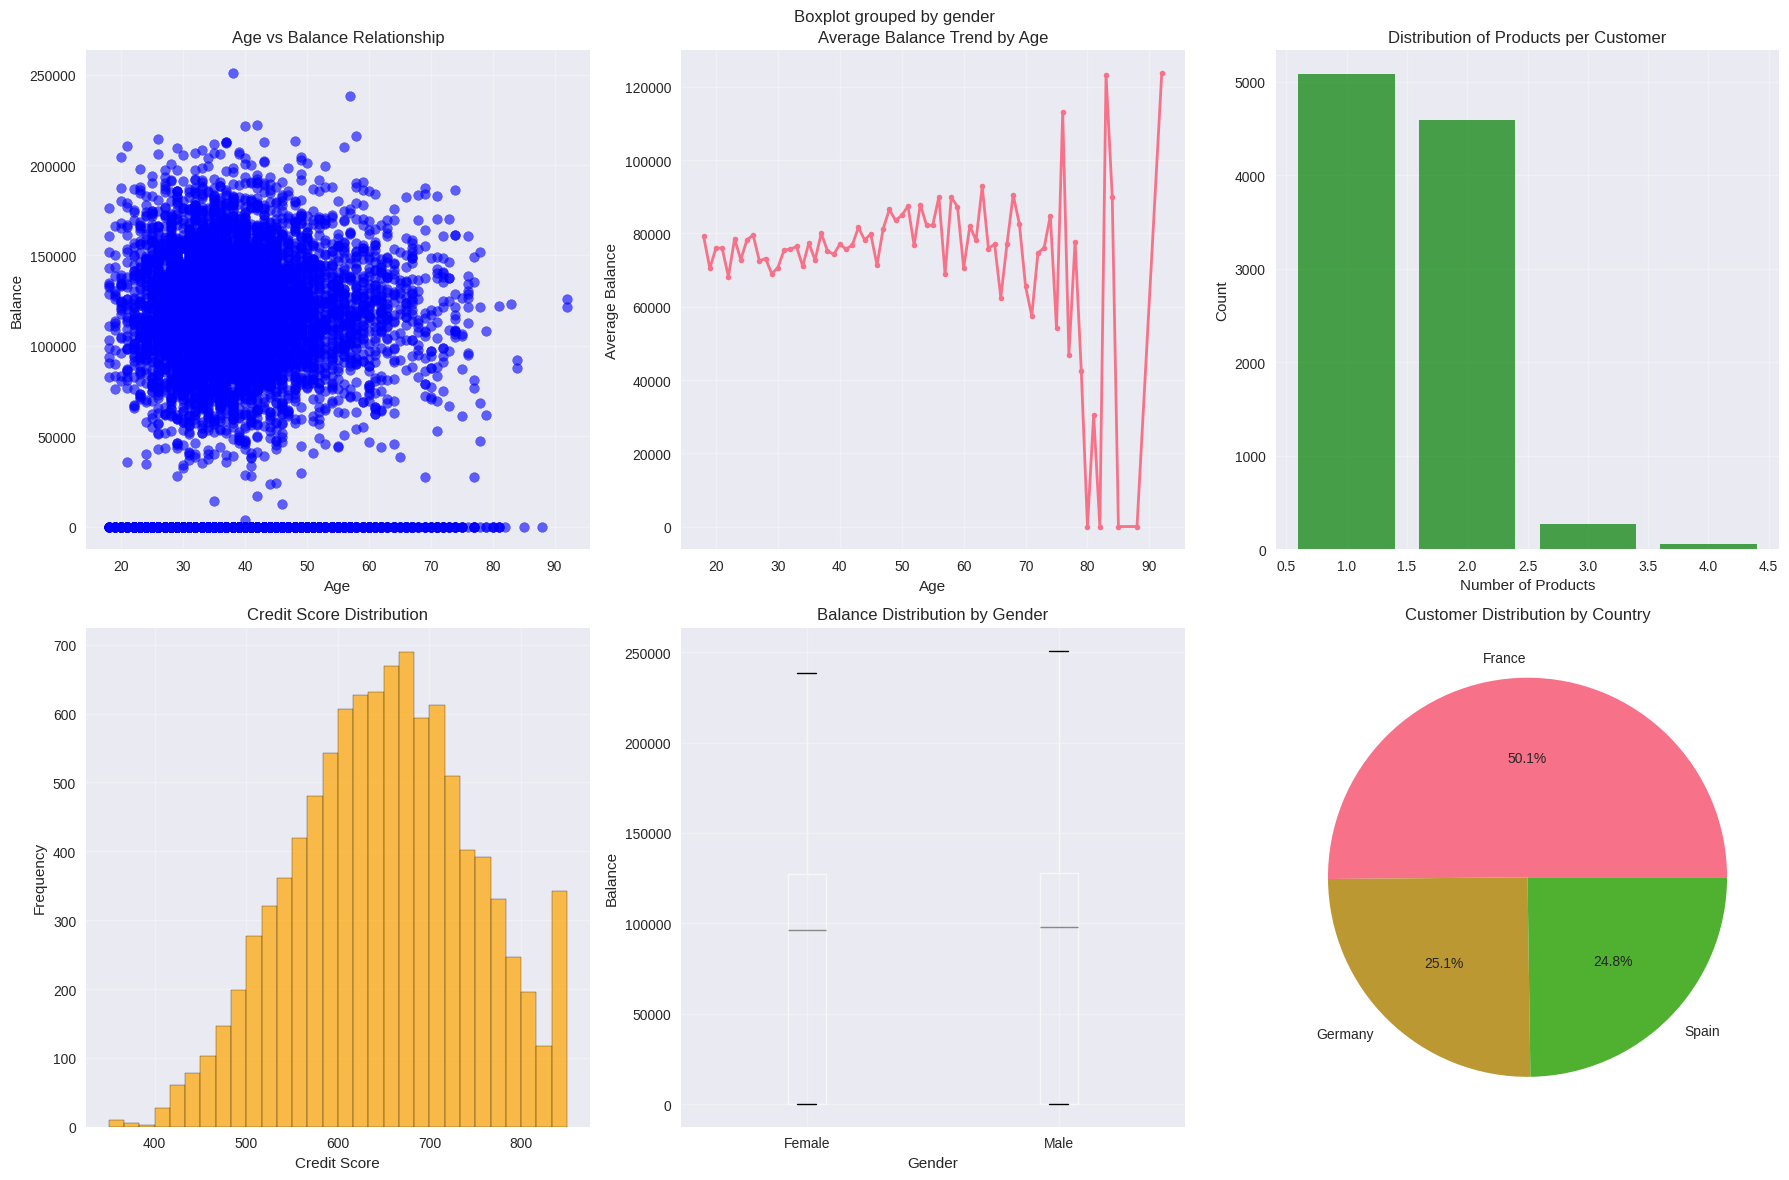

In [2]:
# STEP 2: DATA VISUALIZATION

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Data Visualization Dashboard', fontsize=16, fontweight='bold')

# 1. Scatter Plot: Age vs Balance
axes[0, 0].scatter(df['age'], df['balance'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Balance')
axes[0, 0].set_title('Age vs Balance Relationship')
axes[0, 0].grid(True, alpha=0.3)

# 2. Line Plot: Average Balance by Age
age_balance = df.groupby('age')['balance'].mean().reset_index()
axes[0, 1].plot(age_balance['age'], age_balance['balance'], marker='o', linewidth=2, markersize=4)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Average Balance')
axes[0, 1].set_title('Average Balance Trend by Age')
axes[0, 1].grid(True, alpha=0.3)

# 3. Bar Chart: Product Distribution
product_counts = df['products_number'].value_counts().sort_index()
axes[0, 2].bar(product_counts.index, product_counts.values, color='green', alpha=0.7)
axes[0, 2].set_xlabel('Number of Products')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Distribution of Products per Customer')
axes[0, 2].grid(True, alpha=0.3)

# 4. Histogram: Credit Score Distribution
axes[1, 0].hist(df['credit_score'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Credit Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Credit Score Distribution')
axes[1, 0].grid(True, alpha=0.3)

# 5. Box Plot: Balance by Gender
df.boxplot(column='balance', by='gender', ax=axes[1, 1])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Balance')
axes[1, 1].set_title('Balance Distribution by Gender')
axes[1, 1].grid(True, alpha=0.3)

# 6. Pie Chart: Country Distribution
country_counts = df['country'].value_counts()
axes[1, 2].pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%')
axes[1, 2].set_title('Customer Distribution by Country')

plt.tight_layout()
plt.show()

DATA PREPROCESSING

1. HANDLING MISSING VALUES
----------------------------------------
Missing values in the dataset:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

After introducing missing values:
customer_id           0
credit_score         50
country               0
gender                0
age                   0
tenure                0
balance             100
products_number       0
credit_card           0
active_member         0
estimated_salary      0
churn                 0
dtype: int64

Handling missing values:
- Filling balance missing values with mean
- Filling credit_score missing values with median

After handling missing values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure 

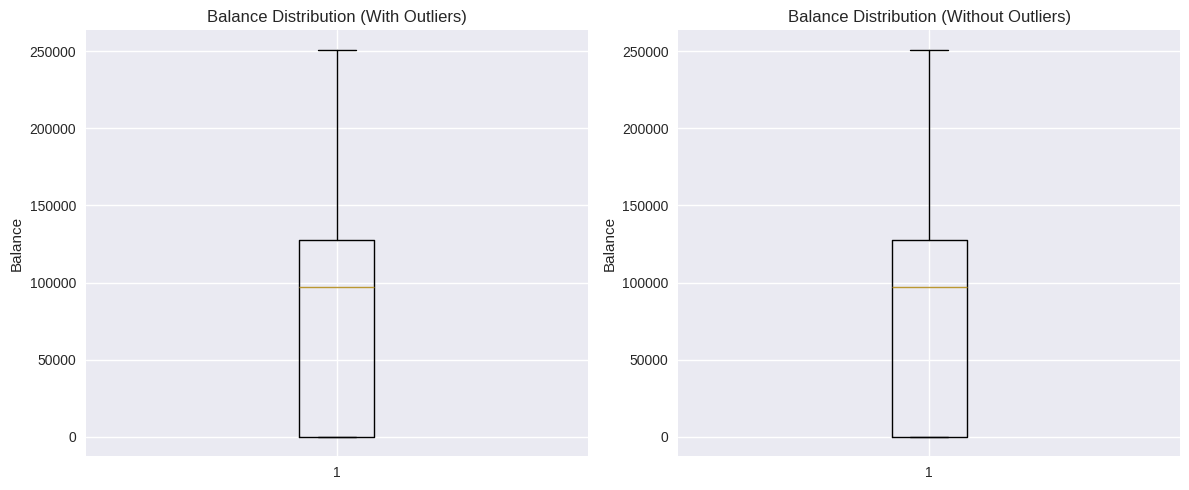


3. DATA REDUCTION
----------------------------------------
Original dataset shape: (10000, 12)
After sampling (80%): (8000, 12)
After dimension reduction: (8000, 11)

4. DATA SCALING AND DISCRETIZATION
----------------------------------------
Min-Max Scaling applied to numeric columns
Sample of scaled data:
      credit_score       age  tenure   balance  estimated_salary
6252         0.492  0.189189     0.3  0.385452          0.208904
4684         0.546  0.337838     0.1  0.000000          0.731908
1731         0.502  0.351351     0.4  0.000000          0.292777
4742         0.312  0.554054     0.8  0.474902          0.853422
4521         0.420  0.121622     0.7  0.498194          0.573346

Age discretization:
age_group
Adult          3562
Middle-aged    1858
Young          1572
Senior          631
Elderly         377
Name: count, dtype: int64

Balance discretization:
balance_group
High         3057
Medium       1201
Very High     775
Low            63
Name: count, dtype: int64


In [3]:
# STEP 3: DATA PREPROCESSING

print("=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# 1. HANDLING MISSING VALUES
print("\n1. HANDLING MISSING VALUES")
print("-" * 40)

# Check for missing values
print("Missing values in the dataset:")
missing_values = df.isnull().sum()
print(missing_values)

# Since this dataset has no missing values, let's simulate some for demonstration
df_with_missing = df.copy()
np.random.seed(42)

# Introduce some missing values randomly
missing_indices = np.random.choice(df_with_missing.index, size=100, replace=False)
df_with_missing.loc[missing_indices, 'balance'] = np.nan

missing_indices_2 = np.random.choice(df_with_missing.index, size=50, replace=False)
df_with_missing.loc[missing_indices_2, 'credit_score'] = np.nan

print(f"\nAfter introducing missing values:")
print(df_with_missing.isnull().sum())

# Handle missing values
print("\nHandling missing values:")
print("- Filling balance missing values with mean")
print("- Filling credit_score missing values with median")

df_cleaned = df_with_missing.copy()
df_cleaned['balance'].fillna(df_cleaned['balance'].mean(), inplace=True)
df_cleaned['credit_score'].fillna(df_cleaned['credit_score'].median(), inplace=True)

print(f"\nAfter handling missing values:")
print(df_cleaned.isnull().sum())

# 2. OUTLIER DETECTION AND REMOVAL
print("\n2. OUTLIER DETECTION AND REMOVAL")
print("-" * 40)

# Use IQR method for outlier detection on balance
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]
print(f"\nNumber of outliers in balance: {len(outliers)}")

# Remove outliers
df_no_outliers = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

# Visualize outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['balance'])
plt.title('Balance Distribution (With Outliers)')
plt.ylabel('Balance')

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers['balance'])
plt.title('Balance Distribution (Without Outliers)')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

# 3. DATA REDUCTION
print("\n3. DATA REDUCTION")
print("-" * 40)

print(f"Original dataset shape: {df.shape}")

# Sampling by percentage (80% of data)
df_sampled = df.sample(frac=0.8, random_state=42)
print(f"After sampling (80%): {df_sampled.shape}")

# Dimension reduction - removing less relevant columns
# For demonstration, let's assume customer_id is not needed for analysis
columns_to_keep = ['credit_score', 'country', 'gender', 'age', 'tenure',
                  'balance', 'products_number', 'credit_card', 'active_member',
                  'estimated_salary', 'churn']

df_reduced = df_sampled[columns_to_keep]
print(f"After dimension reduction: {df_reduced.shape}")

# 4. DATA SCALING AND DISCRETIZATION
print("\n4. DATA SCALING AND DISCRETIZATION")
print("-" * 40)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
numeric_columns = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

df_scaled = df_reduced.copy()
df_scaled[numeric_columns] = scaler_minmax.fit_transform(df_reduced[numeric_columns])

print("Min-Max Scaling applied to numeric columns")
print("Sample of scaled data:")
print(df_scaled[numeric_columns].head())

# Discretization - Age groups
df_discretized = df_reduced.copy()
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior', 'Elderly']
df_discretized['age_group'] = pd.cut(df_discretized['age'], bins=age_bins, labels=age_labels)

print(f"\nAge discretization:")
print(df_discretized['age_group'].value_counts())

# Balance discretization
balance_bins = [0, 50000, 100000, 150000, 250000]
balance_labels = ['Low', 'Medium', 'High', 'Very High']
df_discretized['balance_group'] = pd.cut(df_discretized['balance'], bins=balance_bins, labels=balance_labels)

print(f"\nBalance discretization:")
print(df_discretized['balance_group'].value_counts())


STATISTICAL ANALYSIS

1. GENERAL OVERVIEW OF DATA
----------------------------------------
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Dataset Description:
        customer_id  credit_score    

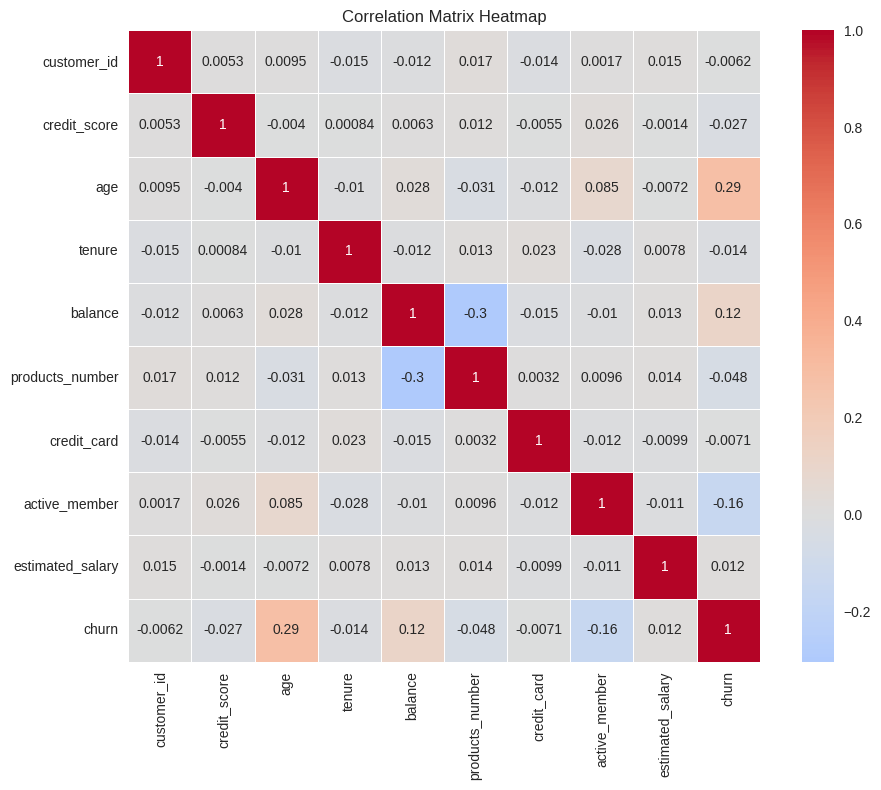

In [4]:
# STEP 4: STATISTICAL ANALYSIS

print("\n" + "=" * 60)
print("STATISTICAL ANALYSIS")
print("=" * 60)

# 1. GENERAL OVERVIEW OF DATA
print("\n1. GENERAL OVERVIEW OF DATA")
print("-" * 40)

print("Dataset Info:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

# 2. CENTRAL TENDENCY MEASURES
print("\n2. CENTRAL TENDENCY MEASURES")
print("-" * 40)

numeric_cols = df.select_dtypes(include=[np.number]).columns
central_tendency = pd.DataFrame()

for col in numeric_cols:
    central_tendency.loc['Minimum', col] = df[col].min()
    central_tendency.loc['Maximum', col] = df[col].max()
    central_tendency.loc['Mean', col] = df[col].mean()
    central_tendency.loc['Median', col] = df[col].median()
    central_tendency.loc['Mode', col] = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan

print("Central Tendency Measures:")
print(central_tendency.round(2))

# 3. DISPERSION MEASURES
print("\n3. DISPERSION MEASURES")
print("-" * 40)

dispersion_measures = pd.DataFrame()

for col in numeric_cols:
    dispersion_measures.loc['Range', col] = df[col].max() - df[col].min()
    dispersion_measures.loc['Q1', col] = df[col].quantile(0.25)
    dispersion_measures.loc['Q3', col] = df[col].quantile(0.75)
    dispersion_measures.loc['IQR', col] = df[col].quantile(0.75) - df[col].quantile(0.25)
    dispersion_measures.loc['Variance', col] = df[col].var()
    dispersion_measures.loc['Standard Deviation', col] = df[col].std()

print("Dispersion Measures:")
print(dispersion_measures.round(2))

# 4. CORRELATION ANALYSIS
print("\n4. CORRELATION ANALYSIS")
print("-" * 40)

correlation_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()